In [43]:
import pandas as pd
# Load the merged dataset
file_path = './Virginia Public Schools Archive/demographics_sol_dataset.csv'
df = pd.read_csv(file_path)

mean_sol_pass_rate = df['SOL Pass Rate'].mean()
print(mean_sol_pass_rate)

0.663268653808416


In [15]:
print(df.head(10))

           Division Name                         School Name  \
0  Prince William County             A. Henderson Elementary   
1        Culpeper County          A.G. Richardson Elementary   
2    Chesterfield County               A.M. Davis Elementary   
3          Warren County              A.S. Rhodes Elementary   
4           Hampton City          A.W.E. Bassette Elementary   
5        Tazewell County  Abb's Valley-Boissevain Elementary   
6           Hampton City                 Aberdeen Elementary   
7       Arlington County                 Abingdon Elementary   
8      Gloucester County                 Abingdon Elementary   
9      Washington County                 Abingdon Elementary   

   percentage_disadvantaged  percentage_english_learners  \
0                  0.274112                     0.137532   
1                  0.381919                     0.053803   
2                  0.542135                     0.194842   
3                  0.358209                     0.05243

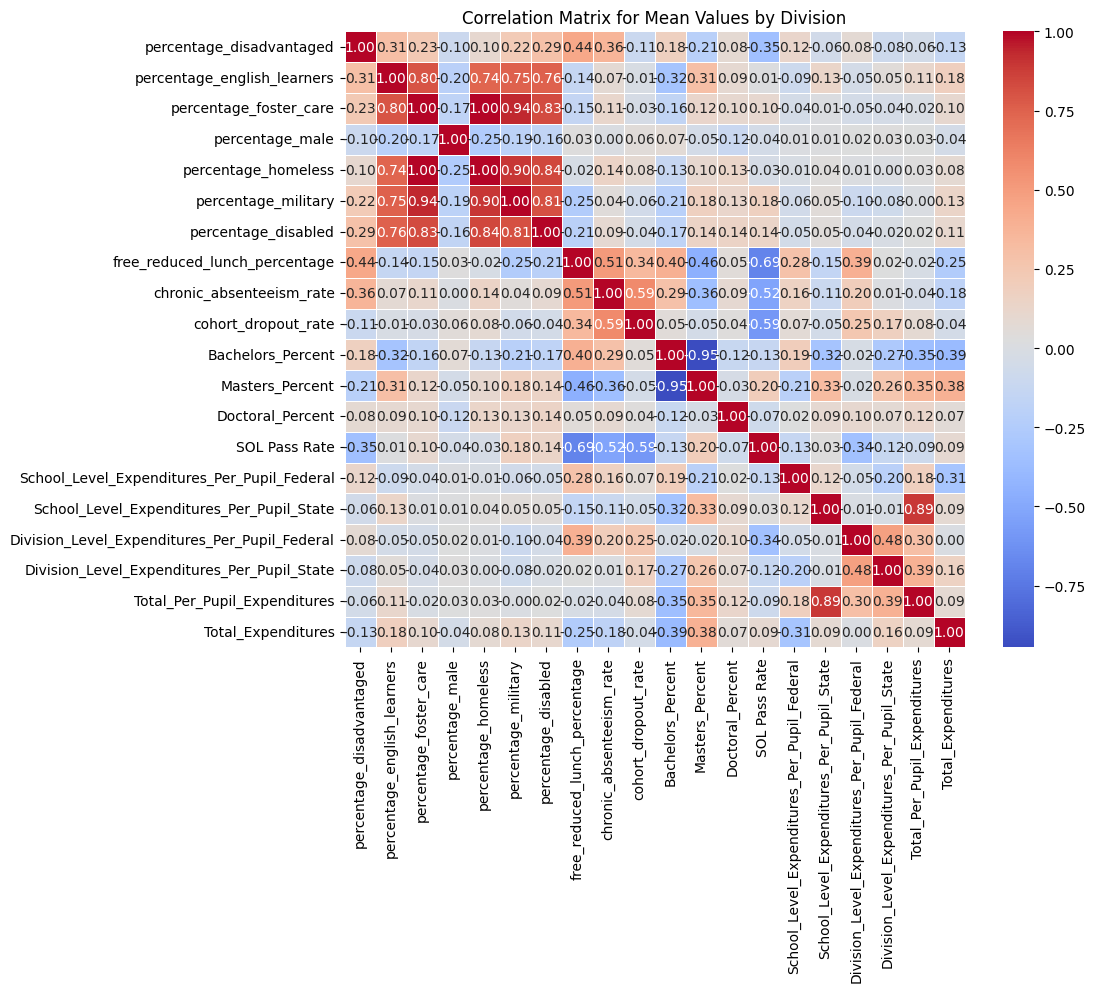

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix for Mean Values by Division')

# Display the heatmap
plt.show()

In [17]:
print(df.columns.tolist())

['Division Name', 'School Name', 'percentage_disadvantaged', 'percentage_english_learners', 'percentage_foster_care', 'percentage_male', 'percentage_homeless', 'percentage_military', 'percentage_disabled', 'free_reduced_lunch_percentage', 'chronic_absenteeism_rate', 'cohort_dropout_rate', 'Bachelors_Percent', 'Masters_Percent', 'Doctoral_Percent', 'SOL Pass Rate', 'School_Level_Expenditures_Per_Pupil_Federal', 'School_Level_Expenditures_Per_Pupil_State', 'Division_Level_Expenditures_Per_Pupil_Federal', 'Division_Level_Expenditures_Per_Pupil_State', 'Total_Per_Pupil_Expenditures', 'Total_Expenditures']


In [18]:
from sklearn.model_selection import train_test_split

# Load the merged dataset
file_path = './Virginia Public Schools Archive/demographics_sol_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Drop rows with missing 'SOL Pass Rate' to align X and y
df = df.dropna(subset=['SOL Pass Rate'])

# Prepare the data
# Drop non-numeric and irrelevant columns from X
X = df.drop(['SOL Pass Rate', 'School Name', 'Division Name', 'Sch_Div'], axis=1, errors='ignore')


# Set the target variable (y)
y = df['SOL Pass Rate']

# Ensure X and y have the same number of rows
assert len(X) == len(y), "X and y must have the same number of rows"


           Division Name                 School Name  \
0  Prince William County     A. Henderson Elementary   
1        Culpeper County  A.G. Richardson Elementary   
2    Chesterfield County       A.M. Davis Elementary   
3          Warren County      A.S. Rhodes Elementary   
4           Hampton City  A.W.E. Bassette Elementary   

   percentage_disadvantaged  percentage_english_learners  \
0                  0.274112                     0.137532   
1                  0.381919                     0.053803   
2                  0.542135                     0.194842   
3                  0.358209                     0.052434   
4                  0.600000                     0.000000   

   percentage_foster_care  percentage_male  percentage_homeless  \
0                0.002538         0.522843                  0.0   
1                0.000000         0.496310                  0.0   
2                0.002809         0.502809                  0.0   
3                0.003731         

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with imputation and linear regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values in features
    ('regressor', LinearRegression())  # Linear regression model
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# # Show the predictions alongside the actual values
# predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
# print(predictions_df.head())

Mean Squared Error: 0.01006628173178054
R^2 Score: 0.5973424019459417


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with imputation and decision tree regressor
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values in features
    ('regressor', RandomForestRegressor(random_state=42))  # Decision tree regressor
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# # Show the predictions alongside the actual values
# predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
# print(predictions_df.head())


Mean Squared Error: 0.007282628330510992
R^2 Score: 0.7086902881104538


2023-2024 average SOl pass rate was 71% (https://www.washingtonpost.com/education/2024/08/20/virginia-students-state-assessments/) and Governor hopes to see continued increase with progress, so 

In [21]:

# Transform the target variable to binary: 1 if 'SOL Pass Rate' > 0.73, otherwise 0
df['Pass'] = (df['SOL Pass Rate'] > 0.73).astype(int)
df.head(10)

,Division Name,School Name,percentage_disadvantaged,percentage_english_learners,percentage_foster_care,percentage_male,percentage_homeless,percentage_military,percentage_disabled,free_reduced_lunch_percentage,...,Masters_Percent,Doctoral_Percent,SOL Pass Rate,School_Level_Expenditures_Per_Pupil_Federal,School_Level_Expenditures_Per_Pupil_State,Division_Level_Expenditures_Per_Pupil_Federal,Division_Level_Expenditures_Per_Pupil_State,Total_Per_Pupil_Expenditures,Total_Expenditures,Pass
0,Prince William County,A. Henderson Elementary,0.274112,0.137532,0.002538,0.522843,0.0,0.124365,0.120558,0.258,...,62.0,2.0,0.7650,524.0,7333.0,571.0,3640.0,12068.0,9941898.0,1
1,Culpeper County,A.G. Richardson Elementary,0.381919,0.053803,0.000000,0.496310,0.0,0.025830,0.169742,0.405,...,56.0,0.0,0.6975,198.0,9208.0,745.0,2110.0,12261.0,14493019.0,0
2,Chesterfield County,A.M. Davis Elementary,0.542135,0.194842,0.002809,0.502809,0.0,0.007022,0.141854,0.609,...,69.0,0.0,0.5300,879.0,8338.0,543.0,4412.0,14172.0,6946661.0,0
3,Warren County,A.S. Rhodes Elementary,0.358209,0.052434,0.003731,0.526119,0.0,0.014925,0.055970,0.373,...,44.0,0.0,0.7200,861.0,8633.0,45.0,2983.0,12522.0,5874488.0,0
4,Hampton City,A.W.E. Bassette Elementary,0.600000,0.000000,0.000000,0.494624,0.0,0.070968,0.094624,0.911,...,32.0,3.0,0.5175,1540.0,6746.0,446.0,2738.0,11470.0,5366257.0,0
5,Tazewell County,Abb's Valley-Boissevain Elementary,0.589744,0.000000,0.000000,0.506410,0.0,0.006410,0.147436,0.946,...,33.0,0.0,0.6700,85.0,6577.0,587.0,2979.0,10228.0,5199480.0,0
6,Hampton City,Aberdeen Elementary,0.543086,0.000000,0.000000,0.484970,0.0,0.080160,0.122244,0.911,...,32.0,3.0,0.5650,1154.0,7056.0,446.0,2738.0,11395.0,5788445.0,0
7,Arlington County,Abingdon Elementary,0.451841,0.389213,0.000000,0.560907,0.0,0.022663,0.116147,0.445,...,65.0,0.0,0.5600,42.0,13126.0,968.0,7589.0,21725.0,9397347.0,0
8,Gloucester County,Abingdon Elementary,0.443956,0.000000,0.000000,0.496703,0.0,0.147253,0.138462,0.461,...,57.0,0.0,0.7175,1220.0,7353.0,283.0,4322.0,13179.0,5590134.0,0
9,Washington County,Abingdon Elementary,0.328798,0.000000,0.011338,0.535147,0.0,0.015873,0.156463,0.424,...,45.0,0.0,0.8550,317.0,7124.0,656.0,3308.0,11405.0,7373071.0,1


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prepare features and target
X = df.drop(['SOL Pass Rate', 'Pass'], axis=1)  # Drop original SOL Pass Rate if not needed
y = df['Pass']

In [31]:
categorical_df = df.select_dtypes(include= "object")
cat_summary = categorical_df.describe().T

In [38]:
# Define the column transformer
num_transformer = Pipeline([
    ("Imputer", SimpleImputer(strategy= "mean")),
    ("Scaler", StandardScaler())])

cat_transformer = Pipeline([
    ("Imputer", SimpleImputer(strategy= "constant", fill_value= "MISSING")),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

preprocessor = ColumnTransformer(
    [("num", num_transformer, numeric_features),
     ("cat", cat_transformer, categorical_features)],
    remainder= "passthrough")

pipeline = Pipeline([("preprocessor", preprocessor)])


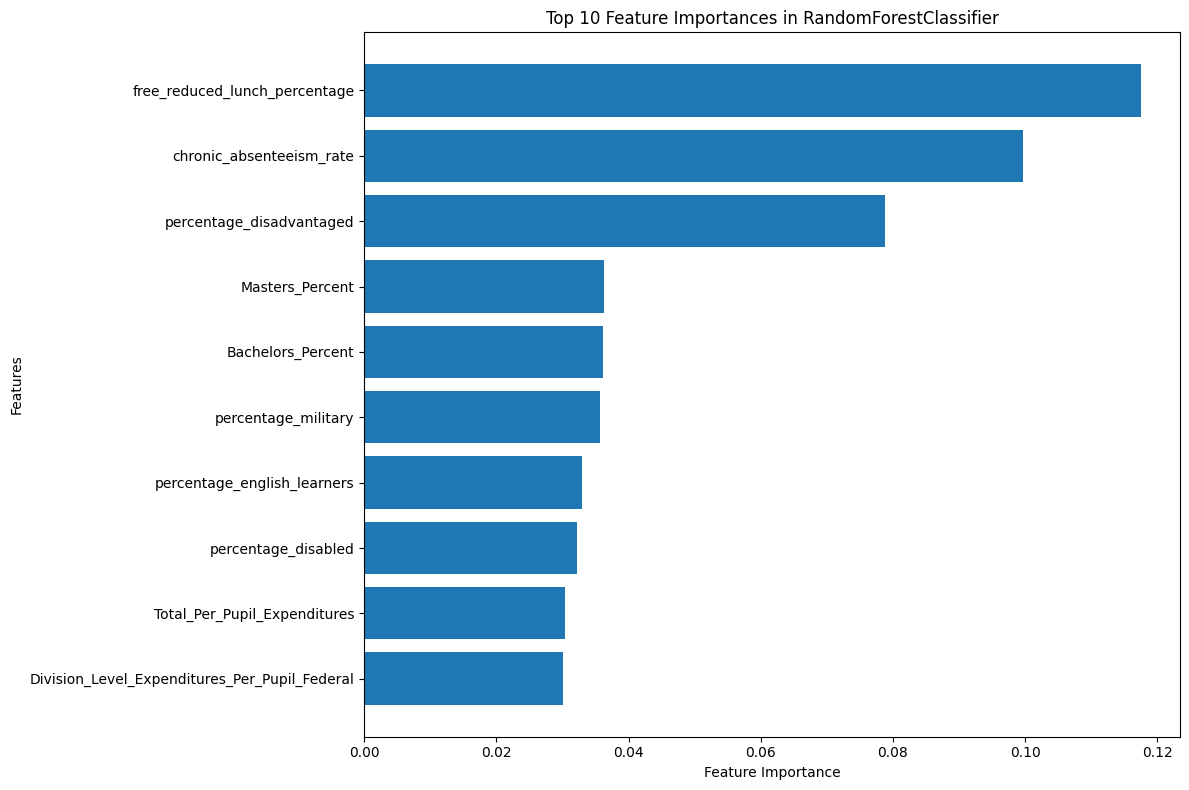

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 features to avoid overcrowding the plot
top_features = feature_importances_df.head(10)

# Increase figure size for readability
plt.figure(figsize=(12, 8))

# Plot feature importances
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in RandomForestClassifier')

# Invert y-axis to have the most important features at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()
